# Importing Libraries

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
import math
from statsmodels.stats import power
from statsmodels.stats import weightstats as stests
from scipy.stats import norm,binom,expon,poisson,geom
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,probplot,levene,shapiro
from scipy.stats import chi2,chisquare,chi2_contingency,f_oneway,kruskal,pearsonr, spearmanr

# Reading data

In [110]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Observations:
### There are no missing data in the data columns. But columns **holiday,  workingday, season and weather** are numeric columns which needs to be converted to categorical columns as columns are categorical in nature.

In [111]:
cols=['season','holiday','workingday','weather']
for i in cols:
  df[i]=df[i].astype('category')

# Conversion of datetime column to datetime datatype

In [147]:
df['datetime']=pd.to_datetime(df['datetime'])

# Pandas describe() function is used to find the measures of central tendency and dispersion

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Observations:

### In this data our target column is count which is count of rental bikes and other columns are features which affect this count.
### We could see the IQR of season being from 2 to 4.
### In Workingday, majority of data 25% being booked on non workingday and rest of the bookings came during working day.
### Similarly we can find the measures of dispersion and central tendency for different feature columns.

In [52]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Univariate Analysis:

## All the numeric and categorical columns are plotted using histplot and observations are recorded.

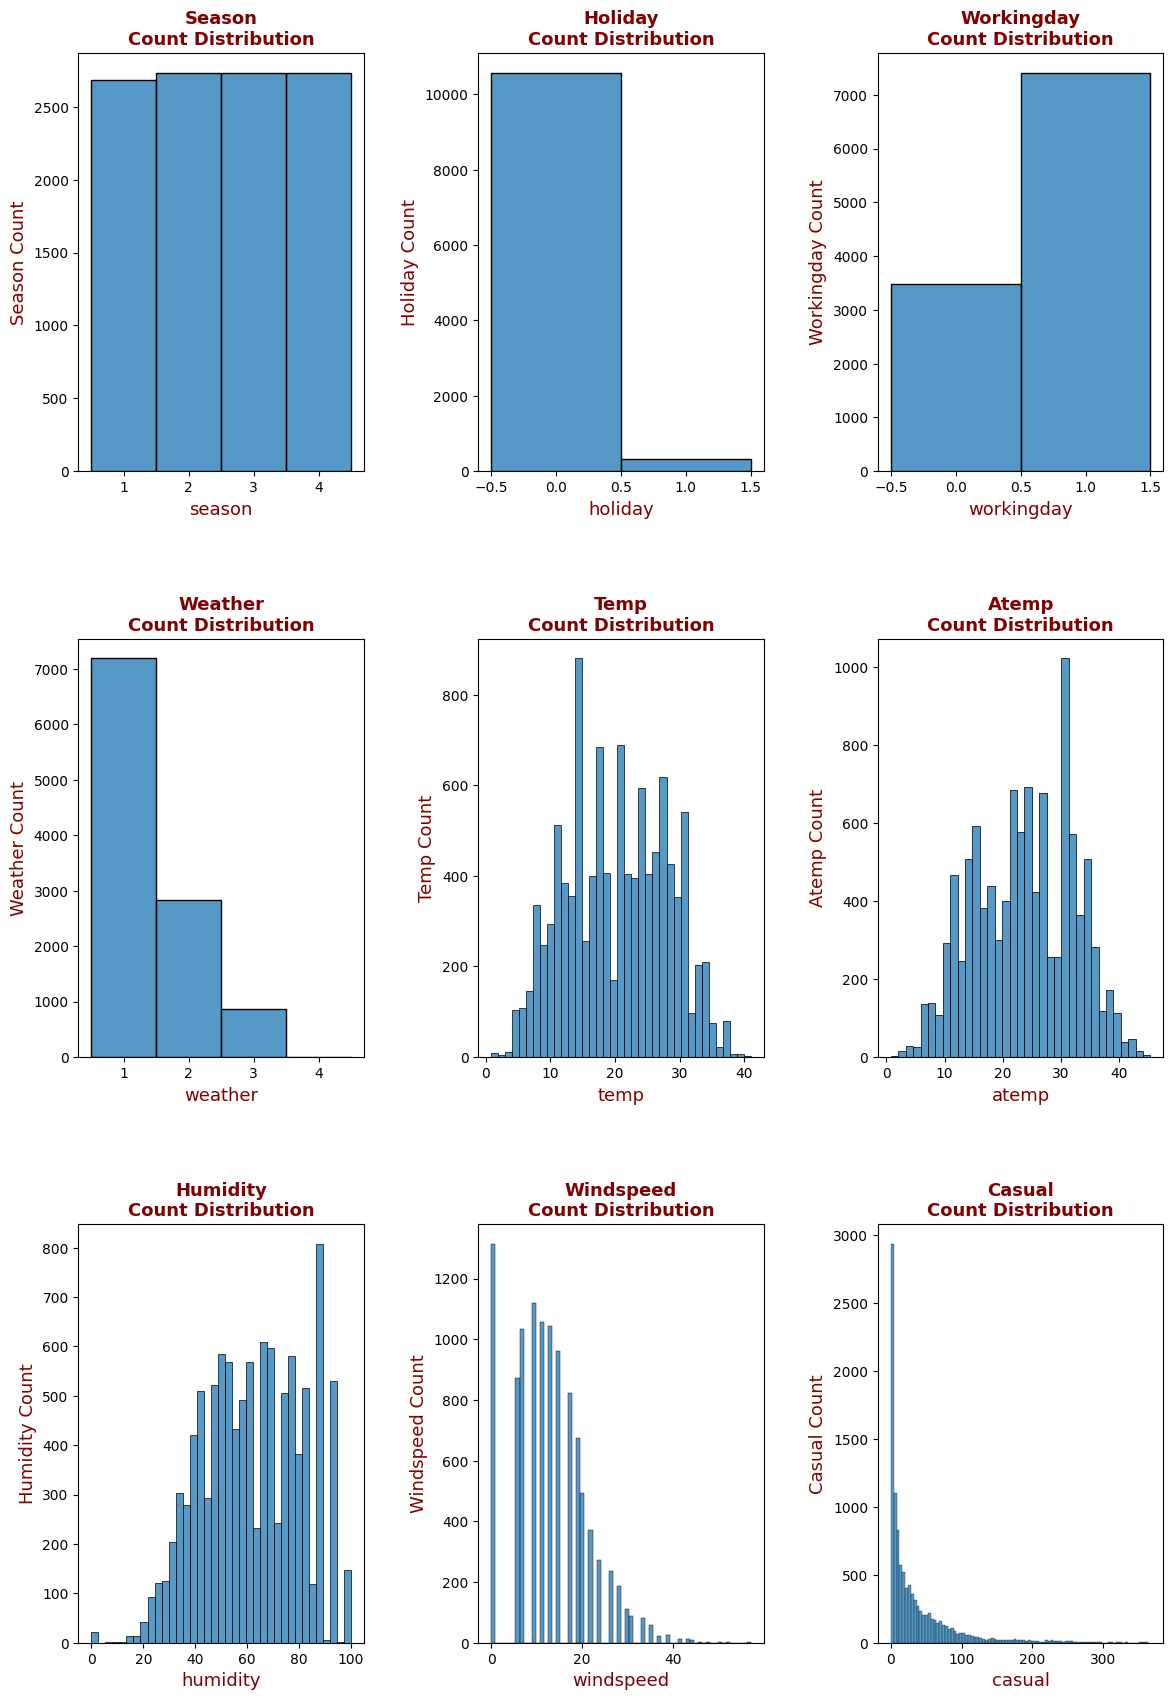

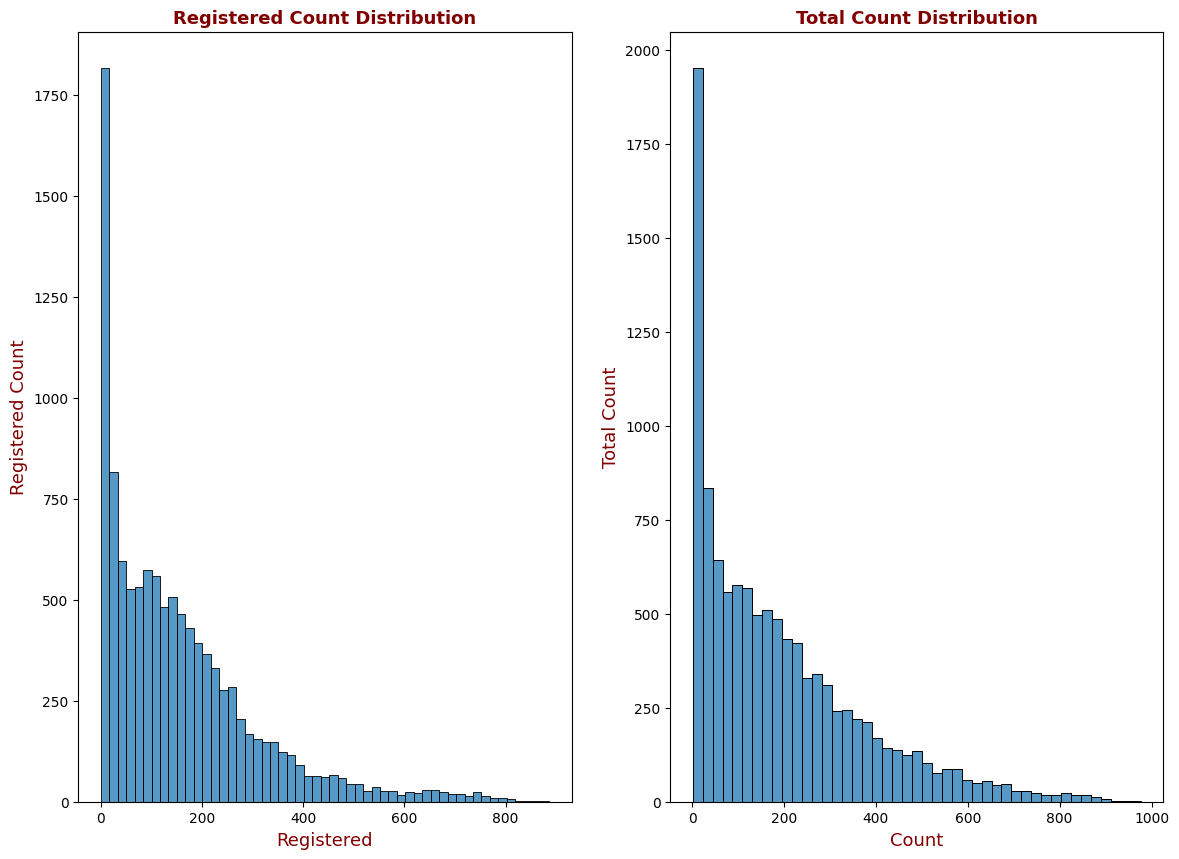

In [19]:
df1=df.loc[:,"season":"count"]
attrs=[]
for i in df1.columns:
  attrs.append(i)
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
fig.subplots_adjust(top=1.7,wspace=0.4,hspace=0.4)
count=0
for i in range(3):
  for j in range(3):
    sns.histplot(data=df1, x=attrs[count],ax=axis[i,j])
    axis[i,j].set_title(f"{attrs[count].capitalize()}\nCount Distribution",fontsize=13,color='maroon',fontweight='bold')
    axis[i,j].set_xlabel(f'{attrs[count]}', fontsize=13, color='maroon')
    axis[i,j].set_ylabel(f'{attrs[count].capitalize()} Count', fontsize=13, color='maroon')
    count+=1
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
sns.histplot(data=df1, x='registered',ax=axis[0])
axis[0].set_title("Registered Count Distribution",fontsize=13,color='maroon',fontweight='bold')
axis[0].set_xlabel('Registered', fontsize=13, color='maroon')
axis[0].set_ylabel('Registered Count', fontsize=13, color='maroon')
sns.histplot(data=df1, x='count',ax=axis[1])
axis[1].set_title("Total Count Distribution",fontsize=13,color='maroon',fontweight='bold')
axis[1].set_xlabel('Count', fontsize=13, color='maroon')
axis[1].set_ylabel('Total Count', fontsize=13, color='maroon')
plt.show()

## Observations:

### We could see working day counts are more than non working day indicating the demand for bikes during working days.
### Looking at weather data we could see most of the bikes rented on clear and partly cloudy environment.
### Most of the bikes are rented on humidity around 40 to 80, temperature around 10 to 20C, windspeed being right skewed with most bike rentals ranging from 0 to 20

# Univariate Analysis continued:
## Numerical columns are plotted using boxplot and its IQR and median are  noted

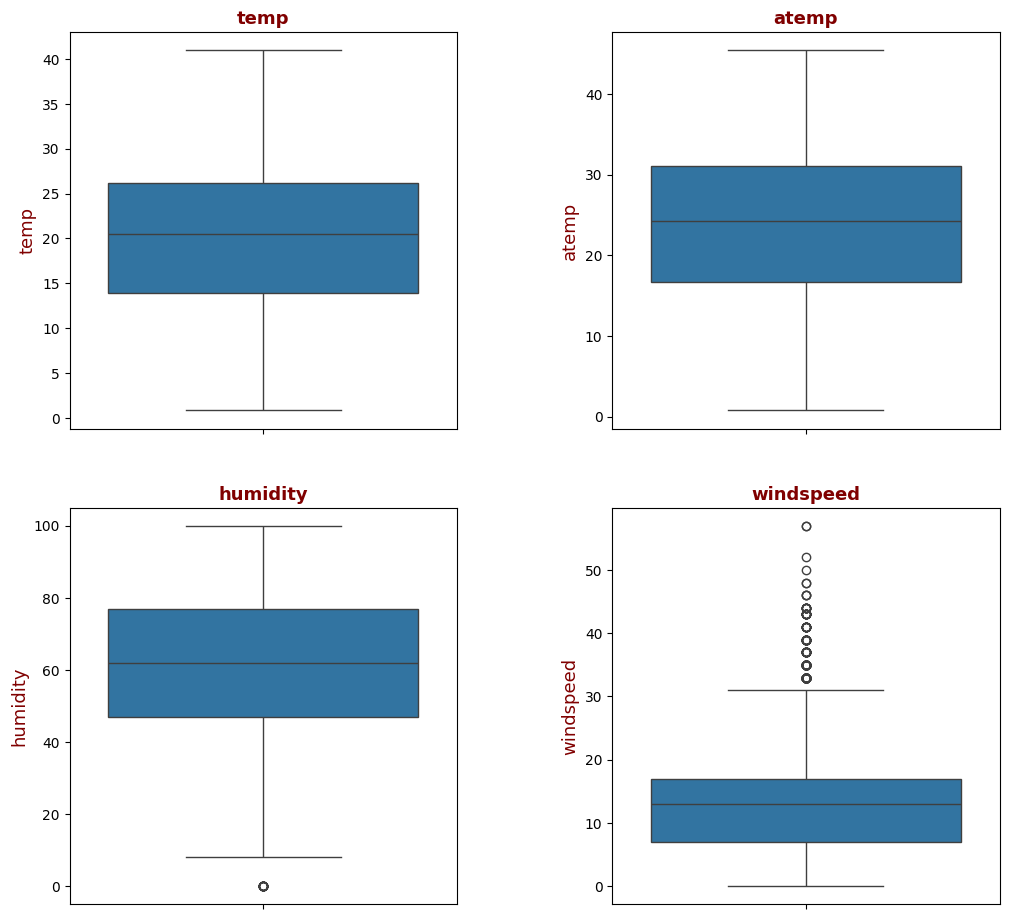

In [25]:
attrs = ['temp','atemp','humidity','windspeed']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2,wspace=0.4)
count=0
for i in range(2):
  for j in range(2):
    sns.boxplot(data=df, y=attrs[count],ax=axis[i,j])
    axis[i,j].set_title(f"{attrs[count]}",fontsize=13,color='maroon',fontweight='bold')
    axis[i,j].set_ylabel(f'{attrs[count]}',fontsize=13, color='maroon')
    count+=1

## Observations:

### We could see that there is difference in temperature and feeing temparature IQR for the given data. Feeling temperature lies between 20 to 30 and temperature around 15 to 25.
### Most of the windspeed lies in the range 9 to 18. But we could see the outliers in the data values ranging beyond 50.
### Humidity IQR falls in the range 55 to 80.

# Bivariate Analysis:

## Box plot is plotted for catergorical columns season,holiday,workingday and weather Vs count and observations are recorded.

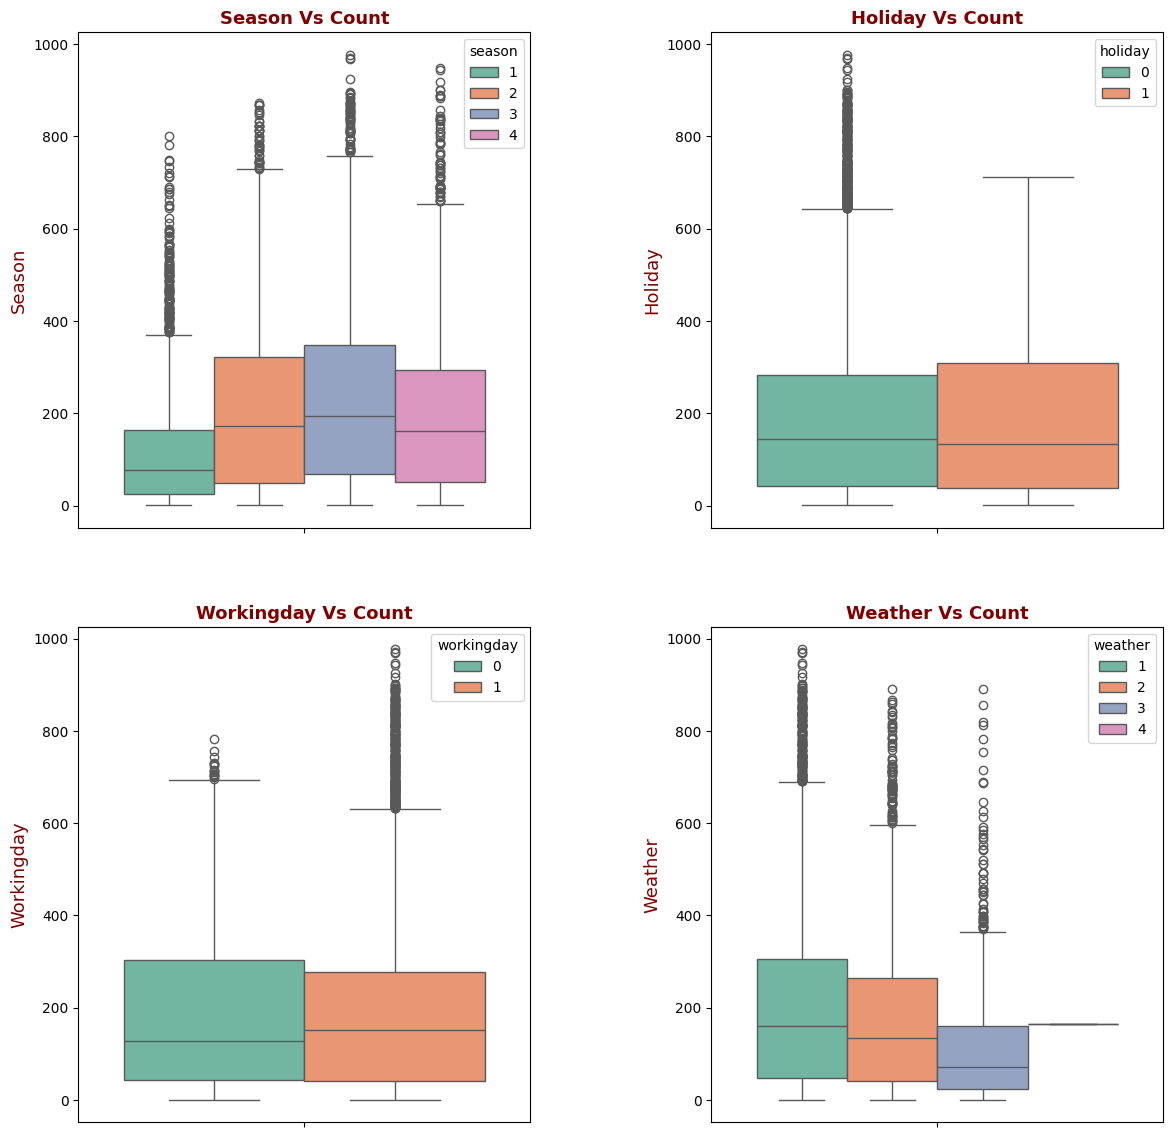

In [37]:
attrs = ['season','holiday','workingday','weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.2,wspace=0.4)
count=0
for i in range(2):
  for j in range(2):
    sns.boxplot(data=df, hue=attrs[count],y='count',ax=axis[i,j],palette='Set2')
    axis[i,j].set_title(f"{attrs[count].capitalize()} Vs Count",fontsize=13,color='maroon',fontweight='bold')
    axis[i,j].set_ylabel(f'{attrs[count].capitalize()}',fontsize=13, color='maroon')
    count+=1

## Obsevations:
### We could see all the categorical variables have outliers in the data.
### Upon observing Seasons,we could see Autumn has the higher spread compared to other seasons making it to be the most liked season for bike rentals.
### We cannot directly say if working day has more demand than non working day as the data looks similar.
### In Weathers, we could see clear , partly coludy weather is more preferred than other enviromental conditions.


# Monthly rentals Count:
## We check how the count is distributed for different months

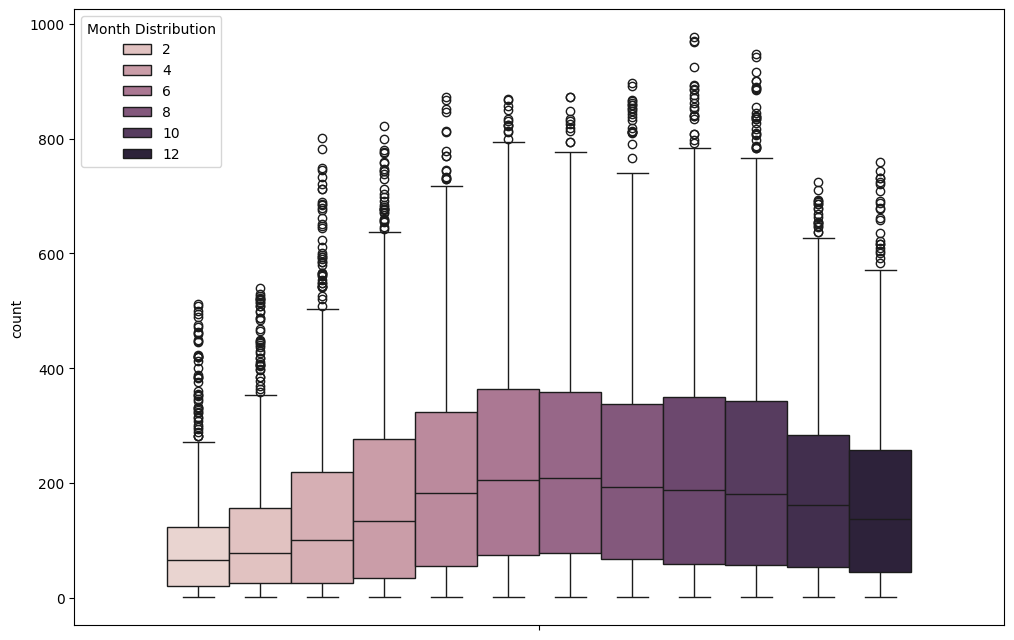

In [162]:
plt.figure(figsize=(12,8))
sns.boxplot(hue=df['datetime'].dt.month,y='count',data=df)
plt.legend(title='Month Distribution')
plt.show()

## Observations:
### If outliers are ignored, We could see most of the orders came during mid of year from May to october and orders are less during Jan, Feb , Mar, Nov and December

# Bivariate Analysis continued:
## Heatmap is plotted for comparing continuos columns and its correlation data is observed.

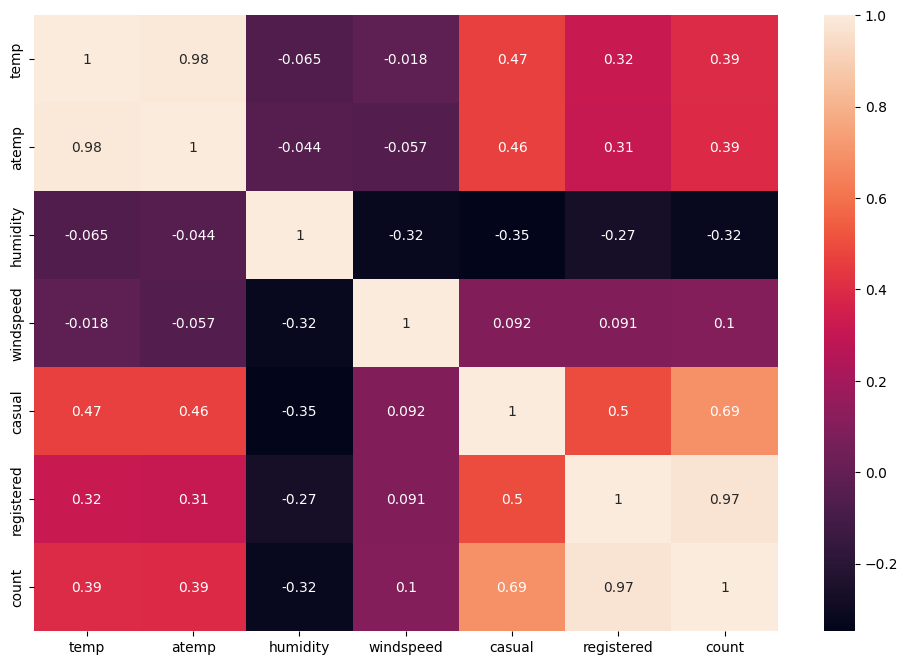

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

## Observations:

### We could see that humidity and count are negetively correlated indicating as humidity rise count decrease.
### Temperature Vs windspeed and humidity as non correlated.
### Since correlation value is 0.97, Registered users contribute more to the business than casual users.

# Non Graphical Analysis:
## Hypothesis testing will be done for features with respect to target column and we check if count depends on the feature.

## Initially we compare weather with seasons performing ChiSquared test
### Null Hypothesis H0: Weather and Season are independent to each other
### Alternate Hypothesis Ha: Weather and Season are dependent.

In [ ]:
vals=pd.crosstab(df['weather'],df['season'])

In [ ]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

## Observations:
### Upon conducting chisquared test for independence we could see that p value < 0.05 (95% confidence level) and we reject Null Hypothesis. We conclude here that weather and season are dependent.

# Checking for assumptions to perform parametric test ANOVA using Shapiro , QQ plot and Levene's test
### H0: Rental Counts for different weather conditions follow normality
### HA: Rental Counts for different weather conditions do not follow normality

In [129]:
df_weather1=df[df['weather']==1]['count']
df_weather2=df[df['weather']==2]['count']
df_weather3=df[df['weather']==3]['count']
print(shapiro(df_weather1.sample(100)))
print(shapiro(df_weather2.sample(100)))
print(shapiro(df_weather3.sample(100)))

ShapiroResult(statistic=0.851657509803772, pvalue=1.3661128228648067e-08)
ShapiroResult(statistic=0.9226367473602295, pvalue=1.9477109162835404e-05)
ShapiroResult(statistic=0.8151650428771973, pvalue=7.438548665916755e-10)


## Observations:
### Since p value is less than sigificance level (0.05) we reject Null Hypothesis and conclude that rental counts for different weather condition do not follow normality. Same is observed in QQ plot below
### We removed weather=4 from the test as we have only one record in it

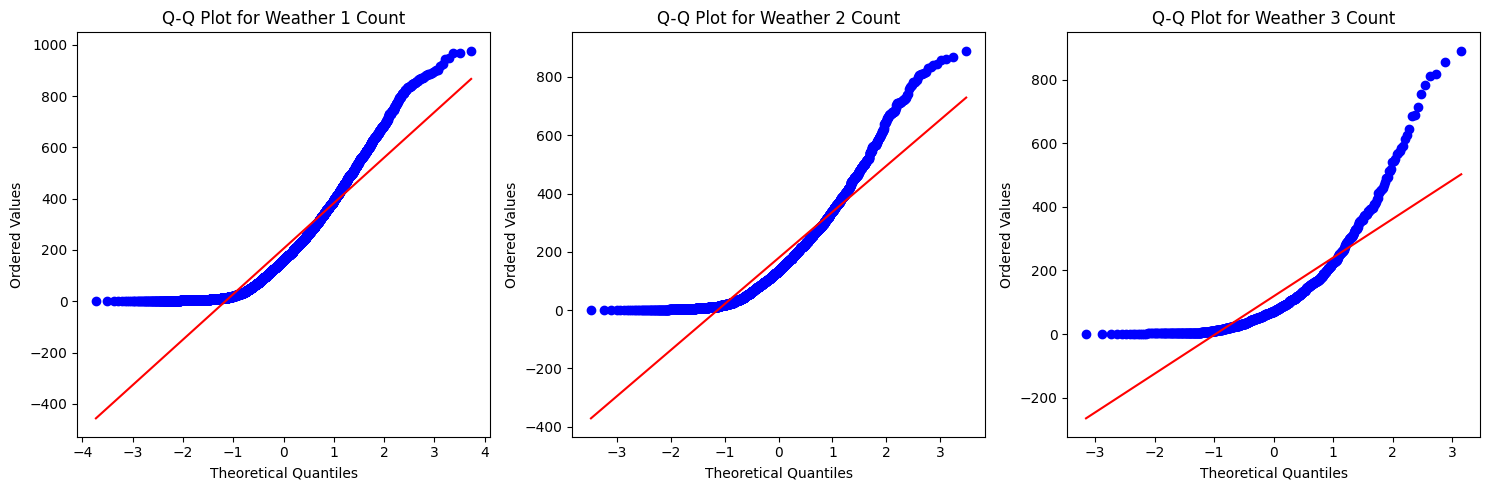

In [141]:
# List of series
series_list = [df_weather1, df_weather2, df_weather3]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(series_list), figsize=(15, 5))

# Loop through series and plot Q-Q plots
for i, series in enumerate(series_list):
    # Generate Q-Q plot
    probplot(series, dist="norm", plot=axes[i])
    # Set title
    axes[i].set_title(f'Q-Q Plot for Weather {i+1} Count')
    # Set labels
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Ordered Values')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


In [130]:
levene(df_weather1,df_weather2,df_weather3)

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

### Since p value is less than significance level in Levene's test, we conclude that variances are different for different weather conditions

# Performing normality test for rentals during different seasons.

In [131]:
df_season1=df[df['season']==1]['count']
df_season2=df[df['season']==2]['count']
df_season3=df[df['season']==3]['count']
df_season4=df[df['season']==4]['count']
print(shapiro(df_season1.sample(100)))
print(shapiro(df_season2.sample(100)))
print(shapiro(df_season3.sample(100)))
print(shapiro(df_season4.sample(100)))

ShapiroResult(statistic=0.8426320552825928, pvalue=6.396515317419471e-09)
ShapiroResult(statistic=0.9110074043273926, pvalue=4.838656877836911e-06)
ShapiroResult(statistic=0.9228214621543884, pvalue=1.9929706468246877e-05)
ShapiroResult(statistic=0.8306031823158264, pvalue=2.425472933609285e-09)


## Observations:

### Based on Shapiro result, p value < significance level(0.05) we conclude that rentals for different seasons do not follow normality.
### Same is observed in QQ plot below.

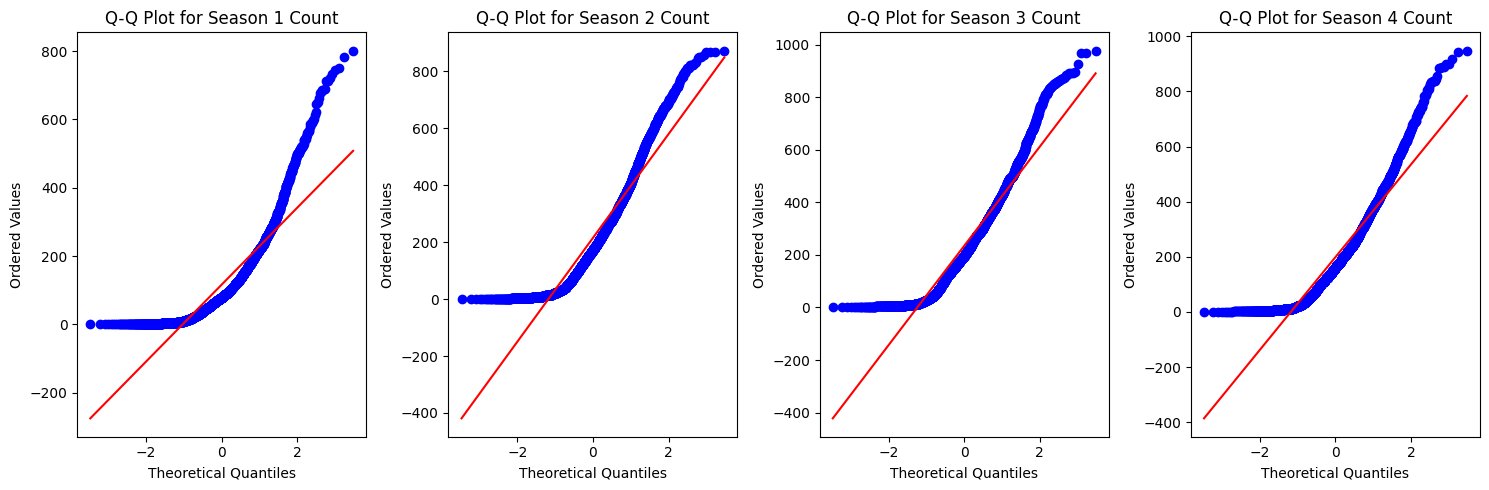

In [142]:
# List of series
series_list = [df_season1, df_season2, df_season3,df_season4]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(series_list), figsize=(15, 5))

# Loop through series and plot Q-Q plots
for i, series in enumerate(series_list):
    # Generate Q-Q plot
    probplot(series, dist="norm", plot=axes[i])
    # Set title
    axes[i].set_title(f'Q-Q Plot for Season {i+1} Count')
    # Set labels
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Ordered Values')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

In [132]:
levene(df_season1,df_season2,df_season3,df_season4)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

### Since p value is less than significance level in Levene's test, we conclude that variances are different for different weather conditions

# Kruskal Wallis Test:
## Based on Shapiro and levene test, we could see that weather and season counts do not follow gaussian distribution so we rule out parametric tests on these features as assumptions fail for ANOVA test.
## We finally dive into Non Parametric Kruskal Wallis test with Null and Alternate hypothesis for Weather and Season respectively as follows:
### H0: Weather is independent on count of Bike Rentals.
### HA: Weather is dependent on count of Bike Rentals.

### H0: Season is independent on count of Bike Rentals.
### HA: Season is dependent on count of Bike Rentals.

In [139]:
kruskal(df_weather1,df_weather2,df_weather3)

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

In [140]:
kruskal(df_season1,df_season2,df_season3,df_season4)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

## Observations:

### Based on Kruskal Wallis test, we reject Null Hypothesis (p<0.05) and conclude that Rental bike count is dependent on Weather and Season respectively.

# Pearson correlation test to check if numeric columns related to count

## For Humidity:
### H0: Humidity is not related to Count
### HA: Humidity is related to count

## For Temperature
### H0: Temperature is not related to Count
### HA: Temperature is related to Count

## For WindSpeed
### H0: Windspeed is not related to Count
### HA: Windspeed is related to Count

In [172]:
print(pearsonr(df['humidity'], df['count']))
print(pearsonr(df['atemp'], df['count']))
print(pearsonr(df['windspeed'], df['count']))

PearsonRResult(statistic=-0.3173714788765946, pvalue=2.9215416637405304e-253)
PearsonRResult(statistic=0.3897844366269768, pvalue=0.0)
PearsonRResult(statistic=0.10136947021033282, pvalue=2.898407203154636e-26)


## Observations:

### Based on statistic values, We could see that  Humidity is negatively correlated to count and Temperature is positively correlated and Windspeed is non correlated to count of rental bikes.

# 2 Sample TTest to check if workingday column has impact on bikes rented.
### H0: Working day is independent of count
### HA: Working day is dependent of count

In [151]:
df_work=df[df['workingday']==1]['count']
df2_nowork=df[df['workingday']==0]['count']

In [152]:
ttest_ind(df_work,df2_nowork,alternative='two-sided')

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

## Observations:

### Based on the test, we fail to reject null hypothesis (p>0.05) and we conclude that Working day is not having any impact on the bike rented.

# TTest to check if registered or casual users contribute more to business
## For Registered:
### H0: Registered Users do not contribute to the count
### HA: Registered Users do contribute to the count
## For Casual:
### H0: Casual Users do not contribute to the count
### HA: Casual Users do contribute to the count

In [165]:
ttest_ind(df['registered'],df['count'],alternative='two-sided')

TtestResult(statistic=-15.93536903683215, pvalue=7.551242350033786e-57, df=21770.0)

In [166]:
ttest_ind(df['casual'],df['count'],alternative='two-sided')

TtestResult(statistic=-86.37047764942866, pvalue=0.0, df=21770.0)

## Observations:
### Since p<0.05, we can conclude that both registered and casual users contribute to the business but we can observe registered users contribute more than casual users based on p value and correlation data.

# Conclusion and Recommendations:

## Yulu is one such startup which revolutionlized the commercial bike rental industry. Few suggestions based on analysis as follows:

### Yulu Should focus on converting casual users to registered users or getting more registered users as they contribute more to the business.
### We could see from both EDA and Hypothesis testing that Weather and Seasons impact on business and most rentals are during clear weather with partly cloudy then extreme weather conditions. So Rnd must be done may be a convertible roof top or providing raincoats as complementary during rainy seasons to ensure more orders for rental bikes.
### Summer , Autumn(fall) and Winter has more orders and fall has highest orders of rest(excluding outliers based on EDA analysis), so frequency and supply of vehicles during these seasons should be maintained.
### WorkingDay and Non working day has no effects on the bikes rented, which needs to be explore further to understand customer behaviour pattern.
### Using Correlation, We could see Humidity and Temperature impacts business as humidity increases bikes rented deceases and for temperature it is directly correlated (can assume upto a certain temperature).